In [504]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [505]:
data = np.loadtxt('./dataset.txt')
# print(data)
features = data.shape[1]-1
# print(features)
X_train = np.array(data[:,:features])
print(X_train.shape)
y_train = np.array(data[:,-1])

(506, 13)


In [506]:
PolyF = PolynomialFeatures(degree = 2)
X_PolyF = PolyF.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Polynomial Features X:{np.ptp(X_PolyF,axis=0)}")

Peak to Peak range by column in Raw        X:[8.896988e+01 1.000000e+02 2.728000e+01 1.000000e+00 4.860000e-01
 5.219000e+00 9.710000e+01 1.099690e+01 2.300000e+01 5.240000e+02
 9.400000e+00 3.965800e+02 3.624000e+01]
Peak to Peak range by column in Polynomial Features X:[0.00000000e+00 8.89698800e+01 1.00000000e+02 2.72800000e+01
 1.00000000e+00 4.86000000e-01 5.21900000e+00 9.71000000e+01
 1.09969000e+01 2.30000000e+01 5.24000000e+02 9.40000000e+00
 3.96580000e+02 3.62400000e+01 7.91676413e+03 1.65052000e+01
 1.61046287e+03 8.98296000e+00 5.96996300e+01 6.19944608e+02
 8.17672433e+03 1.32526720e+02 2.13542248e+03 5.92562785e+04
 1.79722254e+03 3.53125041e+04 1.69165930e+03 1.00000000e+04
 4.21120000e+02 9.00000000e+01 4.11000000e+01 7.63230000e+02
 4.05000000e+03 1.09138500e+03 5.00000000e+02 3.81900000e+04
 1.76000000e+03 3.92900000e+04 1.11000000e+03 7.69296000e+02
 1.95800000e+01 1.68600600e+01 1.62345920e+02 2.72599200e+03
 8.53761360e+01 4.33190000e+02 1.96058400e+04 5.50950000e

In [507]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_PolyF)
print(f"Peak to Peak range by column in Polynomial Features        X:{np.ptp(X_PolyF,axis=0)}")   
print(f"Peak to Peak range by column in Normalized Polynomial Features X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Polynomial Features        X:[0.00000000e+00 8.89698800e+01 1.00000000e+02 2.72800000e+01
 1.00000000e+00 4.86000000e-01 5.21900000e+00 9.71000000e+01
 1.09969000e+01 2.30000000e+01 5.24000000e+02 9.40000000e+00
 3.96580000e+02 3.62400000e+01 7.91676413e+03 1.65052000e+01
 1.61046287e+03 8.98296000e+00 5.96996300e+01 6.19944608e+02
 8.17672433e+03 1.32526720e+02 2.13542248e+03 5.92562785e+04
 1.79722254e+03 3.53125041e+04 1.69165930e+03 1.00000000e+04
 4.21120000e+02 9.00000000e+01 4.11000000e+01 7.63230000e+02
 4.05000000e+03 1.09138500e+03 5.00000000e+02 3.81900000e+04
 1.76000000e+03 3.92900000e+04 1.11000000e+03 7.69296000e+02
 1.95800000e+01 1.68600600e+01 1.62345920e+02 2.72599200e+03
 8.53761360e+01 4.33190000e+02 1.96058400e+04 5.50950000e+02
 1.10042140e+04 8.21957000e+02 1.00000000e+00 8.71000000e-01
 8.78000000e+00 1.00000000e+02 5.88500000e+00 2.40000000e+01
 6.66000000e+02 2.02000000e+01 3.96900000e+02 2.68200000e+01
 6.10416000e-01 4.016094

In [508]:
iters = 70000
sgdr = SGDRegressor(max_iter=iters,learning_rate='invscaling', eta0=2.45e-1, power_t=0.5)
sgdr.fit(X_norm, y_train)

SGDRegressor(eta0=0.245, max_iter=70000, power_t=0.5)

In [509]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 0.00000000e+00  4.86877608e+09  7.42218353e+09 -8.72257037e+09
 -9.44608846e+09 -8.59632934e+09  9.13844647e+09  2.41383832e+09
  2.75944426e+09  1.26632361e+09 -4.02730609e+09  9.25997007e+08
 -6.28415478e+08 -5.46159382e+09 -5.47281419e+09 -3.27076818e+08
  5.81880310e+09 -1.81162710e+08  2.89318026e+08  1.23233655e+10
 -2.47247893e+10 -9.24415609e+09  8.05730013e+09  6.98464322e+09
  5.89529626e+09 -1.76618009e+09 -5.09579527e+09  3.55557088e+09
 -6.44324731e+08 -4.68668259e+09 -1.24591650e+09  3.97464392e+09
  2.53517740e+08 -1.36161061e+10 -2.15069546e+09 -6.42168597e+09
  5.38587749e+09 -1.05924180e+09  1.02154447e+06 -5.27410840e+09
  2.81628381e+09 -7.69584025e+08  7.79611428e+09  1.64870907e+10
  2.95149587e+09 -4.18375354e+09  3.58034966e+09 -6.74052260e+09
 -4.38051931e+09  9.15039140e+08 -9.44608846e+09  6.07578274e+09
  2.45104430e+09 -5.53575832e+09  2.29667345e+10 -2.24353047e+09
  2.09247821e+10 -3.80451664e+10  9.95306486e+09  2

In [510]:
y_pred_sgd = sgdr.predict(X_norm)
print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[-8.49625910e+09 -8.45677508e+08 -1.58267289e+09 -2.95438387e+09]
Target values 
[24.  21.6 34.7 33.4]


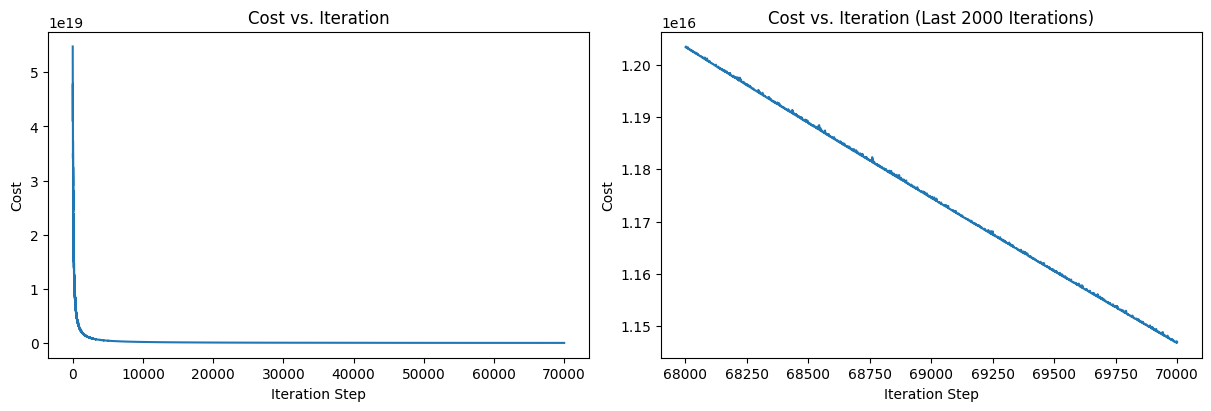

In [511]:
cost_history = []

for _ in range(iters):
    sgdr.partial_fit(X_norm, y_train)  # Fit one epoch at a time
    y_pred = sgdr.predict(X_norm)
    cost = mean_squared_error(y_train, y_pred)
    cost_history.append(cost)

# Plot configuration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Full cost history
ax1.plot(range(1, len(cost_history) + 1), cost_history)
ax1.set_title("Cost vs. Iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')

# Tail of the cost history, showing the last 2000 iterations
tail_size = 2000  # Define the tail size
if len(cost_history) >= tail_size:
    ax2.plot(range(len(cost_history) - tail_size + 1, len(cost_history) + 1), cost_history[-tail_size:])
    ax2.set_title(f"Cost vs. Iteration (Last {tail_size} Iterations)")
else:
    ax2.plot(range(1, len(cost_history) + 1), cost_history)
    ax2.set_title(f"Cost vs. Iteration (Last {len(cost_history)} Iterations)")

ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration Step')

# Display the plots
plt.show()


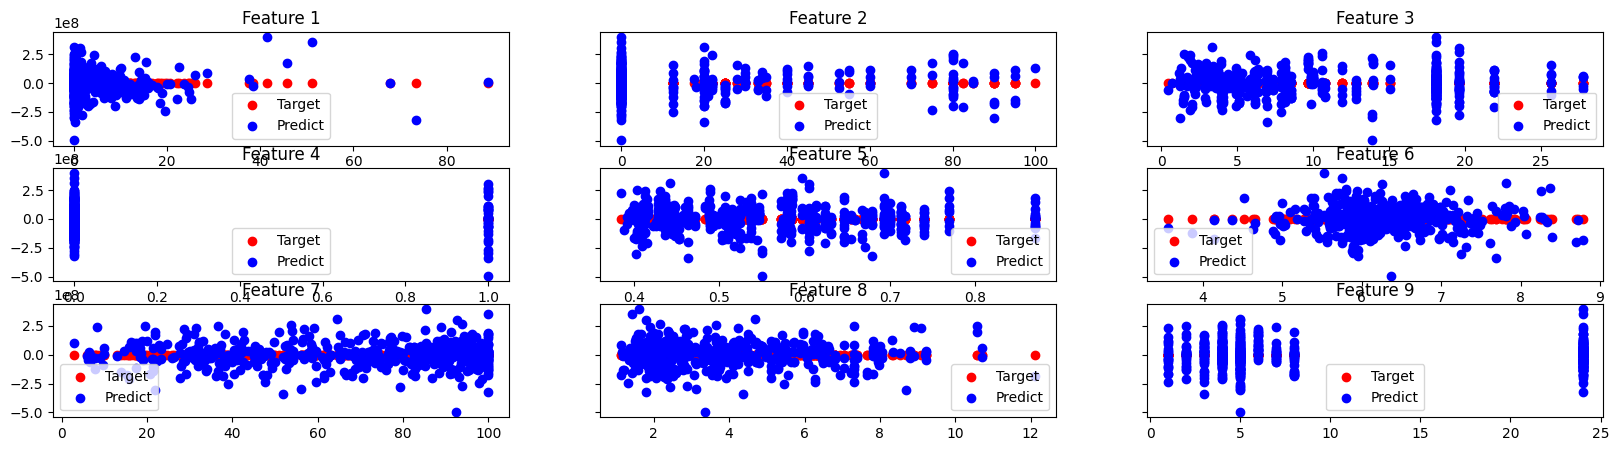

In [512]:
fig, ax = plt.subplots(3, 3, figsize=(20, 5), sharey=True)

for i in range(3):  # Rows
    for j in range(3):  # Columns
        feature_index = i * 3 + j
        if feature_index < features:
            ax[i, j].scatter(X_train[:, feature_index], y_train, label='Target', c='r')
            ax[i, j].scatter(X_train[:, feature_index], y_pred, label='Predict', c='b')
            ax[i, j].set_title(f"Feature {feature_index + 1}")
            ax[i, j].legend()

plt.show()
